In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [3]:
# reading a csv file
delivery = pd.read_csv("E:\\Data Science\\Assignments\\15. Simple Linear Regression\\delivery_time.csv")
print(delivery.head())
print(".....................................................")
print("number of columns",delivery.shape[1])
print("number of rows/records",delivery.shape[0])

   Delivery_Time  Sorting_Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
.....................................................
number of columns 2
number of rows/records 21


In [4]:
delivery.info()
print("...........................................")
print(delivery.isnull().sum())                 #checking for null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery_Time    21 non-null float64
Sorting_Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
...........................................
Delivery_Time    0
Sorting_Time     0
dtype: int64


In [5]:
delivery.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


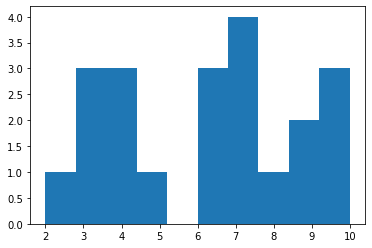

In [8]:
#analysing the data using visualization
plt.hist(delivery.Sorting_Time)
plt.show()

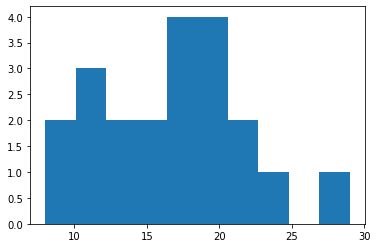

In [9]:
plt.hist(delivery.Delivery_Time)
plt.show()

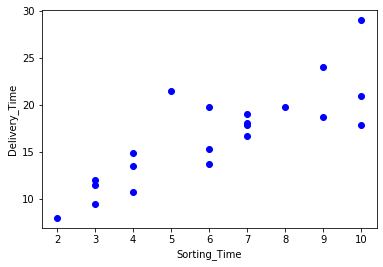

In [11]:
plt.plot(delivery["Sorting_Time"],delivery["Delivery_Time"], "bo")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

In [12]:
#correlation value between feature and outcome
print(np.corrcoef(delivery.Sorting_Time,delivery.Delivery_Time))


[[1.         0.82599726]
 [0.82599726 1.        ]]


In [13]:
#start  training model
model=smf.ols('Delivery_Time~Sorting_Time', data=delivery.loc[delivery.Sorting_Time>2].drop(delivery.index[10]).drop(delivery.index[20])).fit()
print(model.params)        #getting models parameter
print(model.summary())    #summary of models(p value,r square value etc.)
          #r square 0.719

Intercept       6.257961
Sorting_Time    1.657710
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     40.89
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           8.89e-06
Time:                        19:58:21   Log-Likelihood:                -42.176
No. Observations:                  18   AIC:                             88.35
Df Residuals:                      16   BIC:                             90.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [16]:
print(model.conf_int(0.05))   #95% confidence level

                     0          1
Intercept     2.501334  10.014589
Sorting_Time  1.108123   2.207297


In [18]:
pred=model.predict(delivery.iloc[:,:])      #predict the value of delivery time using trained model
print(pred.head(10))

0    22.835065
1    12.888803
2    16.204224
3    21.177355
4    22.835065
5    16.204224
6    17.861934
7    11.231093
8    22.835065
9    21.177355
dtype: float64


In [20]:
#rmse for given model
rmse=np.sqrt(np.mean((pred-delivery.Delivery_Time)**2))
print(rmse)                                         #2.804 RMSE


2.804853544709059


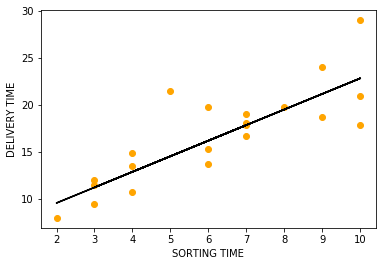

In [23]:
#visualization of regression line using matplotlib
plt.scatter(x=delivery['Sorting_Time'],y=delivery['Delivery_Time'],color='orange')
plt.plot(delivery['Sorting_Time'],pred,color='black')
plt.xlabel('SORTING TIME')
plt.ylabel('DELIVERY TIME')
plt.show()


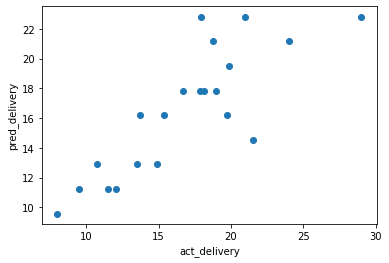

In [25]:
plt.scatter(x=delivery.Delivery_Time, y=pred)
plt.xlabel('act_delivery')
plt.ylabel('pred_delivery')
plt.show()                                                                    #actual delivery time vs predicted delivery time

In [27]:
#looking for alternate model like quadratic or exponential
   #quadratic model
delivery["Sorting_Time_square"]=delivery.Sorting_Time*delivery.Sorting_Time
print(delivery.head())

   Delivery_Time  Sorting_Time  Sorting_Time_square
0          21.00            10                  100
1          13.50             4                   16
2          19.75             6                   36
3          24.00             9                   81
4          29.00            10                  100


In [29]:
model_quad=smf.ols("Delivery_Time~Sorting_Time+Sorting_Time_square",data=delivery).fit()
print(model_quad.params)
print(model_quad.summary())       # 0.693 r square 

Intercept              3.522234
Sorting_Time           2.813002
Sorting_Time_square   -0.093198
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.39e-05
Time:                        20:07:44   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [30]:
print(model_quad.conf_int(0.05))

                            0          1
Intercept           -5.216926  12.261394
Sorting_Time        -0.256067   5.882070
Sorting_Time_square -0.334994   0.148598


In [32]:
pred_quad=model_quad.predict(delivery.iloc[:,:3])
print(pred_quad.head())

0    22.332430
1    13.283069
2    17.045108
3    21.290194
4    22.332430
dtype: float64


In [33]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-delivery.Delivery_Time)**2))
print(rmse_quad)                                     #2.7421 rs

2.7421482037801215


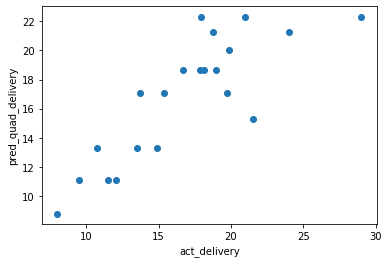

In [35]:
plt.scatter(x=delivery.Delivery_Time, y=pred_quad)
plt.xlabel("act_delivery")
plt.ylabel("pred_quad_delivery")
plt.show()

In [ ]:
     #conclusion:
       -both model linear&quadratic are not same in accuracy
       -linear model(r square=0.719,rmse=2.804)
       -quadratic model(r square=0.693,rmse=2.7421)
       -The lower the RMSE value the better the model, so here quadratic model is the best fit model